In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Simulate dataset
np.random.seed(42)
n_samples = 100

In [3]:

X1 = np.random.rand(n_samples) * 10  # Independent variable 1
X2 = np.random.rand(n_samples) * 5   # Independent variable 2
X3 = np.random.rand(n_samples) * 20  # Independent variable 3

In [ ]:
# True relationship: Y = 3*X1 + 2*X2 + 1.5*X3 + noise
noise = np.random.randn(n_samples) * 2
Y = 3 * X1 + 2 * X2 + 1.5 * X3 + noise

In [5]:
# Create DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'Y': Y})

In [6]:
# Split dataset into training and testing sets
X = df[['X1', 'X2', 'X3']]
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(df.head())

         X1        X2         X3          Y
0  3.745401  0.157146  12.840633  30.902588
1  9.507143  3.182052   1.682799  36.106532
2  7.319939  1.571780   3.232574  34.240128
3  5.986585  2.542853  17.971084  51.269925
4  1.560186  4.537832  12.128581  27.898811


In [7]:
# Train Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predict on test data
y_pred = model.predict(X_test)


In [9]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coefficients = model.coef_
intercept = model.intercept_

mse, r2, coefficients, intercept

(8.406318244785147,
 0.968964499409287,
 array([3.13280787, 2.16830809, 1.54252194]),
 -0.9711621349859527)

In [10]:
# Plot predicted vs actual values
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Predicted vs Actual Values')

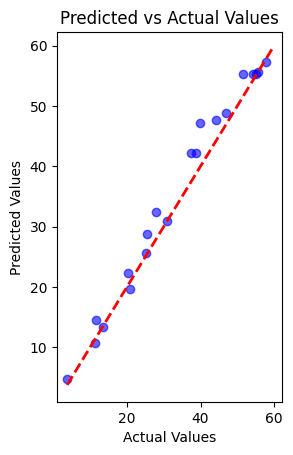

In [11]:
# Subplot 1: Predicted vs Actual values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Reference line (y=x)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")

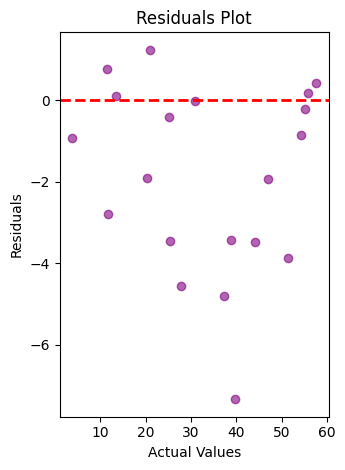

In [12]:
# Subplot 2: Residuals plot
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")

plt.tight_layout()
plt.show()